# Geospatial metadata of records in research data repositories

_Sebastian Garzón, Daniel Nüst, Institute for Geoinformatics, University of Münster, Germany_

Contact: daniel.nuest@uni-muenster.de

Online repository: [https://github.com/o2r-project/geoextent/](https://github.com/o2r-project/geoextent/)

## Introduction

Research data repositories store all kind of files to allow scientists to share data and software for their work.
Repositories provide long-term availability even of large datasets, have in part curation policies to ensure quality of data and metadata, and enable data citation, most commonly by assigning [DOIs](https://en.wikipedia.org/wiki/DOI).
There are numerous such repositories (cf. [re3data.org](https://www.re3data.org/)), some of which are generic while some a tailored to a specific discipline and their typical data, such as genomes.
Repositories' records or projects include both input data as well as generated data or output datasets and visualisations.
Quite often, the files available in the records capture data not only with properties, text, or simple numerical values, but also relevant characteristics of observed objects or areas with a specific **temporal** and/or **spatial extent**.
This spatio-temporal component to data is especially common in all geoscience, geography, and Earth sciences, but is becomming more and more widespread across all sciences and humanities as geospatial data collection and analysis becomes easier.
Despite the fact that these spatio-temporal characteristics of data are present in many research studies (e.g., data is collected in an area during a period of time), only a minority of repositories explicitly supports geospatial and temporal filtering during discovery.
Instead, searching repositories is limited to keywords, which rely on manual tagging and description texts to find data from a specific area (e.g., name of countries).
These limitations make it difficulf for researchers to explore possibly interesting and related datasets.
Geospatial metadata-based search could facilitate discovery of related relevant publications.

Therefore, in this notebook, we explore the actual geospatial properties of records stored in widely used research data repositories, to understand the potential of geospatial metadata for research data discovery.
This is especially interesting for general purpose data repositories, such as [Zenodo](https://zenodo.org/) or [Figshare](https://figshare.com/).

Downloading and automatically extracting the spatial and/or temporal extent of files included in many repository records is achieved with the software **[`geoextent`](https://o2r.info/geoextent/)**.
This notebook is a showcase for `geoextent`, a Python library for automatic extraction of geospatial extents from a set of files based on [GDAL](https://gdal.org/).
This work is also a testbed for `geoextent` as the tool is exposed to many different files and file types.
The successful extractions of geospatial metadata will also build up a database of the most common file formats used to share geographic (spatial) or temporal information used by researchers, and help to determine how well the current version of `geoextent` can handle these files and to define future development tasks. 

Based on the lessons learned in this investigation, it may be interesteting to explore using `geoextent` at time of file upload and build a geospatia metadata-powered search index as part of more research data repositories.


In the remainder of this document, we first implement a few functions to search research data repositories and download files one record at a time.
Then, the geospatial extent of each record is extracted and stored in a local database.
The results of the extraction are then visualised and discussed.

## Harvesting extents from repositories

The following functions (a) search repositories and extract the DOIs, which are stored in simple files, and (b) download records based on their DOI from research data repositories.
The storing of DOIs ensures reproducibility of the workflows.
If available, functions also extract the metadata of the record, e.g., if location information is available already in a given repository for comparison with the extracted extent.

In [1]:
### TODO ###
# Add function to translate the DOI of a dataset to name and repository-specific identifier.

### Zenodo

#### About

The very popular [Zenodo](https://zenodo.org/) repository is run by CERN in Switzerland.
It is free for use with records up to 50 GB in size.

Zenodo allows simple __[spatial search](https://zenodo.org/api/records/?bounds=-180,-90,180,90)__, yet the feature is not well documented and  users cannot seem to create these metadata themselves.
The type of geospatial metadata also seems limited to point __[locations](https://developers.zenodo.org/#depositions)__.

#### Getting list of records

The following method extracts all the Zenodo identifiers from an specific search term, so they can be used later as a basis for downloading and extracting geospatial metadata.


In [2]:
import requests
import json

def get_list_of_records(term,mb_size = False,bounds = False):
    
    parameters = {'q':str(term),
              "access_right":"open",
              "size" : "1",
              "type":"dataset"}
    
    if bounds is not False:
    
        try:
            min_lon,min_lat,max_lon,max_lat = bounds[0],bounds[1],bounds[2],bounds[3]
            
            if min_lon < max_lon and min_lat < max_lat:
                
                if min_lon in range(-180,181) and min_lat in range(-90,91) and max_lon in range (-180,181) and max_lat in range (-90,91):
                    bbox = str(bounds[0])+","+str(bounds[1])+","+str(bounds[2])+","+str(bounds[3])
                    parameters['bounds'] = bbox
                else:
                    print("Invalid bounds. Bounds parameter is going to be ignore. >limite")   
            else:
                print("Invalid bounds. Bounds parameter is going to be ignore.")
        except:
            print("Invalid bounds. Bounds parameter is going to be ignore. Error")
    
    if term is False:
        parameters.pop("q")
    
    response_hits = requests.get('https://zenodo.org/api/records/',
                              params=parameters)
    
    
    hits = response_hits.json()['hits']['total']
    
    print("{} repositories found for your query.".format(hits))
    zenodo_search = {}
    
    if hits > 0 :
        
        parameters["size"]=str(hits)
        
        response = requests.get('https://zenodo.org/api/records/',
                              params=parameters)
        
        content = response.json()

    for i in range(0,hits):
        
        files = content['hits']['hits'][i]['files']
        size = round(sum(f['size'] for f in files)/2 **20,1)
        
        if size <= mb_size or mb_size is False:
            record_id = content['hits']['hits'][i]['conceptrecid']
            doi = content['hits']['hits'][i]['doi']
            title = content['hits']['hits'][i]['metadata']['title']
            license = content['hits']['hits'][i]['metadata']['license']['id']
            zenodo_search[record_id] = {"doi":doi,"title":title,"license":license,"size_mb":size}
    
    if mb_size is not False:
        print("{} out of {} repositories smaller than {} MB".format(len(zenodo_search),hits,mb_size))

    return zenodo_search

### Figshare

[Figshare](https://figshare.com/) is a popular general purpose research data repository.


In [3]:
#TODO

# This function downloads a Figshare repository and extracts the available metadata

### GFZ Data Services

The [GFZ Data Services](https://dataservices.gfz-potsdam.de/portal/) archives and publishes data across all geoscientific disciplines and in all sizes, from large dynamic real-time datasets to small long-tail data.

In [4]:
#TODO

# This function downloads a GFZ Data Services repository and extracts the available metadata

### Pangaea

[Pangaea](https://www.pangaea.de/) is a open library for archiving and publishing georeferenced data from Earth system research.

As the data is already georeferenced, ti could be interesting to compare `geoxtent`'s results with the original metadata.

In [5]:
#TODO

# This function downloads a Pangaea repository and extracts the available metadata

## Extracting geographic extent

These sets of functions iterate through the repositories and extract the geospatial information.

1. If an extent is found (or if not = NA), Add record URL, ID, and some record metadata (names of contained files, author, repository URL, license, ...),  and the resulting extent in WKT in a local "database" in GeoPackage format.

2. If not extent is found, store the record as visited and the list of filenames

In [6]:
import geoextent.lib.extent as geoextent
import zenodo_get as zget
import tempfile
import os
import sys
import pandas as pd
import geopandas as gpd
import shapely
from shapely.geometry import Polygon
from pyproj import CRS
import itertools
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

/home/garzon/.local/lib/python3.6/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


<IPython.core.display.Javascript object>

### Metadata functions

This method extracts the repository information from the geoextent 'details' function output.
The output is a dataframe with relevant features of each repository.

In [7]:
def rep_to_table(list_records):
    """ Extracts repository info from list_records
    Keyword arguments:
    list_records -- dictionary with geoextent extraction by repository 
    """
    
    repository_id = []
    title = []
    doi = []
    license = []
    tbox = []
    bbox = []
    crs = []
    
    for i in list_records:

        repository_info = list_records[i]
        repository_id.append(i)
        title.append(repository_info.get('title'))
        doi.append(repository_info.get('doi'))
        license.append(repository_info.get('license'))
        geoextent = repository_info.get('geoextent')
        
        if geoextent is not None:
            tbox.append(geoextent.get('tbox'))
            bbox.append(geoextent.get('bbox'))
            crs.append(geoextent.get('crs'))
        else:
            tbox.append(None)
            bbox.append(None)
            crs.append(None)
            
    def transform_bbox(x):
        try:
            bbox = shapely.geometry.box(*x)
        except:
            bbox = None    
        return bbox
    
    bbox = list(map(lambda x: transform_bbox(x) if x is not None else None,bbox))
    tbox = list(map(lambda x: str(x[0])+'/'+str(x[1]) if x is not None else None, tbox))
    d = {'repository_id': repository_id, 'title': title, 'doi':doi,'license':license,
        'bbox':bbox,'tbox':tbox,'crs':crs}
    
    repositories = pd.DataFrame(d)
  
    return repositories

This method extracts the file details from the geoextent `details` function output for a **single folder**.

In [8]:
def extract_details(details, repository=1):
    """ Extracts details from geoextent extraction
    Keyword arguments:
    details -- dictionary with geoextent extraction by repository
    repository -- Parent repository
    """

    filename = []
    file_format = []
    handler = []
    bbox = []
    tbox = []
    crs = []
    
    for i in details:
        
        file = details[i]
        
        if file is None:
            filename.append([i])
            file_format_v = os.path.splitext(i)[1][1:]
            if file_format_v == '':
                file_format_v = 'undetected'
            file_format.append([file_format_v])
            handler.append([None])
            bbox.append([None])
            tbox.append([None])
            crs.append([None])
        else:
            filename.append([i])
            file_format.append([file.get('format')])    
            handler_v = file.get('geoextent_handler')
            bbox_v = file.get('bbox')
            tbox_v = file.get('tbox')
            crs_v = file.get('crs')
            handler.append([handler_v])
            bbox.append([bbox_v])
            tbox.append([tbox_v])
            crs.append([crs_v])
            
            if file.get('format') == 'folder':
                
                details_folder = extract_details(file['details'],repository)
                filename.append(details_folder['filename'])
                file_format.append(details_folder['format'])
                handler.append(details_folder['handler'])
                bbox.append(details_folder['bbox'])
                tbox.append(details_folder['tbox'])
                crs.append(details_folder['crs'])
    
    if any(isinstance(i, list) for i in filename):
        filename = list(itertools.chain.from_iterable(filename))
        file_format=  list(itertools.chain.from_iterable(file_format))
        handler = list(itertools.chain.from_iterable(handler))
        bbox= list(itertools.chain.from_iterable(bbox))
        tbox = list(itertools.chain.from_iterable(tbox))
        crs = list(itertools.chain.from_iterable(crs))
        
    repository_id = [repository]*len(filename) 
    d = {'repository':repository_id,'filename': filename, 'format': file_format, 'handler':handler,'bbox':bbox,'tbox':tbox,'crs':crs}
    return d

This method extracts the file details from the geoextent 'details' function output for **multiple folders** by using the `extract_details()` function. The output is a dataframe with relevant features of each file.

In [9]:
def files_to_table(list_records):
    
    """ Extracts file information from list_records
    Keyword arguments:
    list_records -- dictionary with geoextent extraction by repository 
    """
    
    filename = []
    rep_id = []
    file_format = []
    handler = []
    tbox = []
    bbox = []
    crs = []

    for rep in list_records:

        geoextent = list_records[rep]['geoextent']
        
        if geoextent is not None:
            details = geoextent.get('details')
            repository = extract_details(details,rep)
            rep_id.append(repository.get('repository'))
            filename.append(repository.get('filename'))
            file_format.append(repository.get('format'))
            handler.append(repository.get('handler'))
            tbox.append(repository.get('tbox'))
            bbox.append(repository.get('bbox'))
            crs.append(repository.get('crs'))
        else:
            filename.append([None])
            rep_id.append([rep])
            file_format.append([None])
            handler.append([None])
            tbox.append([None])
            bbox.append([None])
            crs.append([None])
            
    if any(isinstance(i, list) for i in filename):
        rep_id = list(itertools.chain.from_iterable(rep_id))
        filename = list(itertools.chain.from_iterable(filename))
        file_format =  list(itertools.chain.from_iterable(file_format))
        handler = list(itertools.chain.from_iterable(handler))
        bbox= list(itertools.chain.from_iterable(bbox))
        tbox = list(itertools.chain.from_iterable(tbox))
        crs = list(itertools.chain.from_iterable(crs))
        
    def transform_bbox(x):
        try:
            bbox = shapely.geometry.box(*x)
        except:
            bbox = None    
        return bbox
    
    bbox = list(map(lambda x: transform_bbox(x) if x is not None else None,bbox))
    tbox = list(map(lambda x: str(x[0])+'/'+str(x[1]) if x is not None else None, tbox))
    
    d = {'repository':rep_id,'filename': filename, 'format': file_format, 'handler':handler,'bbox':bbox,'tbox':tbox,'crs':crs}
    files = pd.DataFrame(d)
    
    return files

This function downloads a repository by their **zenodo_id**, and then extract the geographical extent and temporal extent by using _geoextent_

In [10]:
from IPython.utils import io

def zenodo_geoextent(zenodo_id):
    """Download a zenodo repository and extract the geoextent
    Keyword arguments:
    zenodo_id -- zenodo id of repository.
    """
    
    with tempfile.TemporaryDirectory() as tmp_dir:
        tmp_dir_dest = os.path.join(tmp_dir,str(zenodo_id))
        with io.capture_output() as captured:
            zget.zenodo_get([str(zenodo_id),"-e","-o",tmp_dir_dest])
        geo_extent = geoextent.fromDirectory(tmp_dir_dest, True, True, True)
        
    return geo_extent

### Function to retrieve extents from Zenodo

In [11]:
#Get list of records

def geoextent_by_search_term_zenodo(term="geo",mb_size = False,bounds = False,output_path="geo_all.gpkg"):
    """ Extract geoextent of zenodo repositories base on a search term
    Keyword arguments:
    term -- search term (default "geo")
    mb_size -- mb size limit (double) defaul (False) if False there is no size limit
    output_path --  file name to return summary tables from extraction in a geopackage file
    """
    
    list_records = get_list_of_records(term,mb_size,bounds)
    num_repositories = len(list_records)
    error_ids = []
    counter = 1
    for i in list_records:
        print(str(counter)+" out of "+ str(num_repositories)+" repositories analyzed", end='\r')
        counter += 1
        try:
            list_records[i]['geoextent'] = zenodo_geoextent(i)
        except:
            list_records[i]['geoextent'] = None
            error_ids.append(i)
    
    try:
        repo = rep_to_table(list_records)     
        files = files_to_table(list_records)
        gdf_repo = gpd.GeoDataFrame(repo, geometry='bbox', crs=CRS("EPSG:4326"))
        gdf_files = gpd.GeoDataFrame(files, geometry='bbox', crs=CRS("EPSG:4326"))
        gdf_files.to_file(output_path, layer="files", driver="GPKG")
        gdf_repo.to_file(output_path, layer="repositories", driver="GPKG")

    except:
        print("Error exporting results into GeoPackage.")
        return list_records
    
    data = {"list_record":list_records,"error_ids":error_ids}
    
    return data

**Example**

In [12]:
import warnings
import logging
warnings.simplefilter("ignore")
logging.disable(sys.maxsize)

f = geoextent_by_search_term_zenodo(term="geo",mb_size = 0.1, bounds=False, output_path="geo_p1_mb.gpkg");
logging.disable(logging.NOTSET)

224 repositories found for your query.
25 out of 224 repositories smaller than 0.1 MB
There is no time value for GeoTIFF files


### Extract extents for repositories up to 1GB for the keyword 'geo'

Uncomment and run the following analysis to reproduce the results below.


In [ ]:
#result_data = geoextent_by_search_term_zenodo(term="geo",mb_size = 1024, bounds=False, output_path="geo_1G.gpkg")
#logging.disable(logging.NOTSET)

# Results

After the extraction of geographical and temporal extent of zenodo repositories, the geopackage file is loaded to inspect the results. The geopackage contains two tables, the first one **repositories** and the second one **files**. The two tables are tied together by using the **repository_id** (repositories) and **repository** (for files) property.

In [13]:
repositories_gdf = gpd.read_file("geo_1G.gpkg",layer="repositories")
files_gdf = gpd.read_file("geo_1G.gpkg",layer="files")

num_repositories = len(repositories_gdf)
num_files = len(files_gdf)

# File type 'folder' is removed to avoid repetition of information
index = files_gdf[files_gdf['format'] == 'folder'].index
files_gdf.drop(index, inplace=True)

# File 'md5sums.txt' file is removed as this file is included by zenodo in all of the repositories
index = files_gdf[files_gdf['filename'] == 'md5sums.txt'].index
files_gdf.drop(index, inplace=True)


### Results by repository

Portion of repositories table.

In [14]:
repositories_gdf[0:10]

repository_id,title,doi,license,tbox,crs,geometry


### Results by files

Portion of files table.

In [15]:
from itables import show

files_gdf[20:30]

# As this table could contain thousends of entries, the fview is reduced. Is you want to display all the content, uncomment the following line:
# show(files_gdf, maxBytes=0)
# for more info : # https://mwouts.github.io/itables/#downsampling

,repository,filename,format,handler,tbox,crs,geometry


### Bounding box 

Visualization of bounding boxes

In [16]:
import folium
from folium import plugins
from folium import  FeatureGroup, LayerControl
from folium.features import GeoJsonPopup 

# Extract only repositories and files with geometry

rep_valid = repositories_gdf[repositories_gdf.geometry.is_valid].copy().reset_index(drop=True)
files_valid = files_gdf[files_gdf.geometry.is_valid].copy().reset_index(drop=True)

m = folium.Map(max_bounds= True,height=500)
stripes = plugins.pattern.StripePattern(angle=-45,color="#B22222")
style = {'fillColor': '#B22222', 'color': '#B22222', 'dashArray': 5,'fillPattern' :stripes,'fillOpacity' : 0.6}   

for i in range(0,len(rep_valid)):
    
    fg = FeatureGroup(name=rep_valid["repository_id"][i])
    folium.GeoJson(data = rep_valid["geometry"][i],
                   name = rep_valid["repository_id"][i],
                   style_function = lambda x: style,
                  ).add_child(
        folium.Popup(
            "<b> REPOSITORY </b>"+
            "<li><b> Repository ID: </b> " + rep_valid["repository_id"][i]+"</li>"+
            "<li><b> Title: </b> " + rep_valid["title"][i] + "</li>"+
            "<li><b>   D.O.I: </b> </b>" + rep_valid["doi"][i]+"</li>"+
            "<li><b>  License: </b>" + rep_valid["license"][i]+"</li>"+
            "<li><b> tbox: </b>" + str(rep_valid["tbox"][i])+"</li>"
            ,max_width='250')).add_to(fg)
    
    for j in range(0,len(files_valid)):
        if files_valid["repository"][j]==rep_valid["repository_id"][i]:
            folium.GeoJson(data = files_valid["geometry"][j],
                        name = files_valid["repository"][j]).add_child(
                folium.Popup(
                "<b> FILE </b>"+
                "<li><b> Filename: </b> " + files_valid["filename"][j] + "</li>"+
                "<li><b> Format: </b> " + files_valid["format"][j] + "</li>"+
                "<li><b> Geoextent Handler: </b> " + str(files_valid["handler"][j])+ "</li>"+
                "<br><b> REPOSITORY OF ORIGIN </b>"+
                "<li><b> Repository ID: </b> " + rep_valid["repository_id"][i]+ "</li>"+
                "<li><b> Title: </b> " + rep_valid["title"][i] + "</li>"+
                "<li><b>   D.O.I: </b>" + rep_valid["doi"][i]+ "</li>" +
                "<li><b>  License: </b>" + rep_valid["license"][i] + "</li>"
                ,max_width='400')).add_to(fg)
    m.add_child(fg)
            
LayerControl().add_to(m)
m

**GRAPH 1: Proportion of repositories with geospatial metadata**

In [17]:
# NUMBER OF REPOSITORIES WITH GEOSPATIAL METADATA / NUMBER OF REPOSITORIES
# what do they answer? 
# Proportion of repositories with geospatial metadata

**GRAPH 2: Proportion of repositories with successful geospatial extraction (Geoextent)**

In [18]:
# NUMBER OF REPOSITORIES WITH SUCCESSFULL GEOSPATIAL EXTRACTION / NUMBER OF REPOSITORIES
# what do they answer? 
# Does geoextent allow to extract geospatial information from repositories in a higher proportion that current metadata ?

**GRAPH 3: Distribution of files in repositories**

Distribution of files found in inspected repositories.

<AxesSubplot:title={'center':'File format distribution in repositories'}>

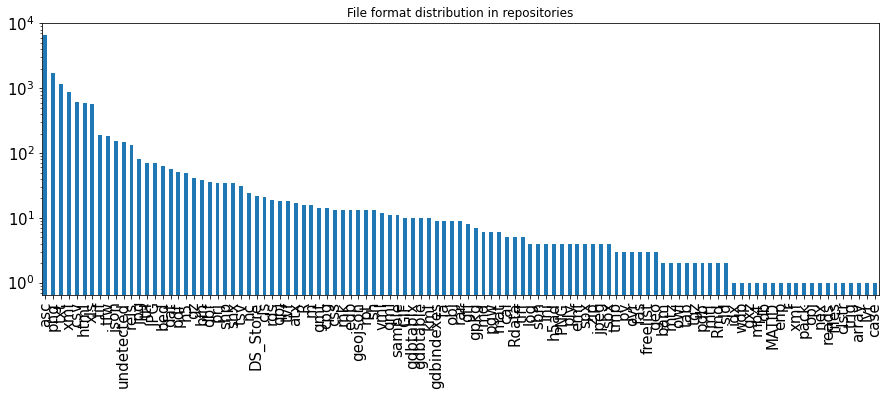

In [19]:
files_gdf['format'].value_counts().plot(kind='bar',
                                        title="File format distribution in repositories",
                                        figsize=(15,5),
                                        logy=True,
                                        fontsize=15)

**GRAPH 4: Occurrence of fileformat in repositories**

Distribution of fileformats in repositories. Percentage of ocurrence of a fileformat in inspected repositories.

<AxesSubplot:title={'center':'File format distribution in repositories'}, xlabel='Fileformat', ylabel='Percentage of ocurrence'>

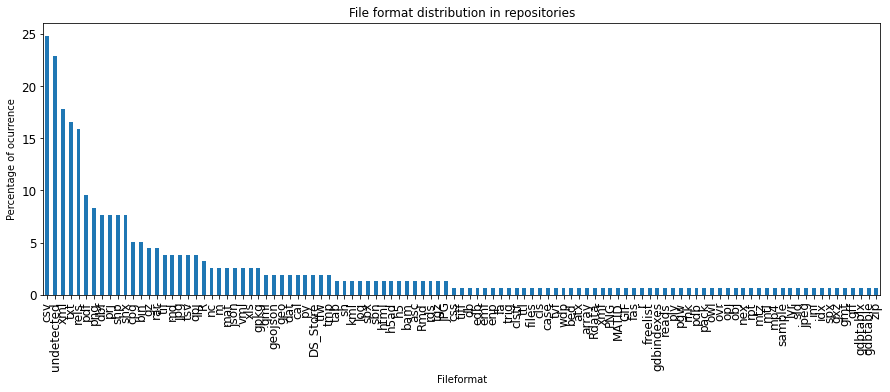

In [20]:
count = files_gdf.groupby(by=['format','repository']).count().groupby(by="format").count()['filename'].sort_values(ascending=False)/num_repositories*100
count.plot(kind='bar',
           title="File format distribution in repositories",
           xlabel = "Fileformat",
           ylabel = "Percentage of ocurrence",
           figsize=(15,5),
           fontsize=12)

**GRAPH 5: Distribution of files in repositories with successful geospatial extraction (Geoextent)**

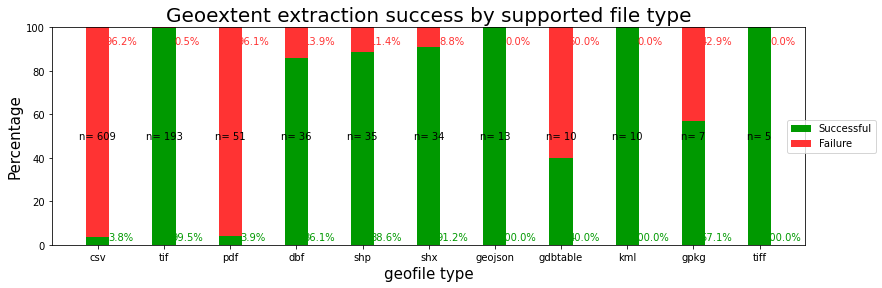

In [21]:
d1 = pd.DataFrame({"Total":files_gdf['format'].value_counts()})
d2 = pd.DataFrame({"geoextent_success":files_valid['format'].value_counts()})

dj = d1.join(d2)
l = dj.dropna().copy()

l['perc_success'] = (l['geoextent_success']/l['Total'])*100

labels = l.index.values
success = l['perc_success']
failure = 100 - l['perc_success']

color_success = "#009900"
color_failure = "#FF3333"

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,4))
width = 0.35
ax.bar(labels, success, width, label='Successful',color= color_success)
ax.bar(labels, failure, width, bottom=success, color = color_failure,label='Failure')
ax.set_ylabel('Percentage',size=15)
ax.set_xlabel('geofile type',size=15)
ax.set_title('Geoextent extraction success by supported file type',size = 20)
ax.set_ylabel('Percentage')

count = 0
for bar in ax.patches: 

    displace =-1
    color = color_failure

    pos = 90
    
    if bar.get_y() == 0:
        
        n = l['Total'][count]
        count+=1
        displace = 3
        color= color_success
        pos = 0
        ax.annotate("n= "+str(n),  
                   (bar.get_x() + (bar.get_width()/2),  
                   50), ha='center', va='center', 
                   size=10, xytext=(0, 0),color='black', 
                   textcoords='offset points')
    
    ax.annotate(format(bar.get_height()/100, ".1%"),  
                   (bar.get_x() + (bar.get_width()*1.5),  
                   pos), ha='center', va='center', 
                   size=10, xytext=(0, 8),color=color, 
                   textcoords='offset points')
    
box = ax.get_position() 
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(loc='center right', bbox_to_anchor=(1.1, 0.5))

plt.show()

In [25]:
geofiles = l.index.values
files_no_geoextent = files_gdf[~files_gdf.geometry.is_valid].copy().reset_index(drop=True)
geofiles_no_geoextent = files_no_geoextent[files_no_geoextent['format'].isin(geofiles)]
geofiles_no_geoextent = geofiles_no_geoextent.merge(repositories_gdf.loc[:,['repository_id','doi']], left_on='repository', right_on='repository_id')

**TABLE 1: Filenames of failed geoextractions**

This table corresponds to the a portion of the files on **graph 6** with no geographical extent detectec by _geoextent_ (i.e "failure"). These files correspond to format files that could be potentially extracted (e.g Shapefiles or Tiff). This table does no include other types of geofiles not present in **graph 6**. 

In [26]:
geofiles_no_geoextent.loc[0:10,["repository","filename","doi"]]

,repository,filename,doi


**GRAPH 6: Distribution of (geo)files in repositories with unsuccessful geospatial extraction (Geoextent)**

In [27]:
# DISTRIBUTION OF FILES IN UNSUCCESSFUL GEOSPATIAL EXTRACTIONS
# what do they answer?
# What type of files (geo but not supported by geoextent) are more popular in the repositories?

#TODO:
#list of files with geoextent (potential source osgeo)
#geofiles = ['cal','csv','dbf','geojson','gff','gmt','gpkg','jpg','json','lyr','pdf','png','prj','shp','shx','tif','tfw','xml']